---
# **1. Install & Import Library**
---

In [1]:
!pip install -U pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c4a941ce13d2e32a9f3c55f27882255667743ee160b325512e189e7ee1fbf64d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [2]:
# py 파일 경로 설정
%cd /content/drive/MyDrive/final-project/code

/content/drive/MyDrive/final-project/code


In [3]:
import pyLDAvis
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import re
import keyword_find

LDA1_pre = keyword_find.LDA1_pre
normal_score = keyword_find.normal_score
normal_keybert = keyword_find.normal_keybert
make_dict = keyword_find.make_dict
keyword_extract = keyword_find.keyword_extract
Ensemble_LDA = keyword_find.Ensemble_LDA
similar_word = keyword_find.similar_word
keyword_ratio = keyword_find.keyword_ratio
getratio = keyword_find.getratio

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

---
# **2. Data Load**
---

In [ ]:
genre_list = [
    '드라마', '판타지', '공포', '멜로', '모험',
    '스릴러', '느와르', '다큐', '코미디', '가족',
    '미스터리', '전쟁', '애니', '범죄', '뮤지컬',
    'SF', '액션']

In [4]:
# 장르 이름 수정
# 멜로애정로맨스
genre = '스릴러'
file_path = f'/content/drive/MyDrive/final-project/processed_data/result/{genre}/'
n_random = 10

In [5]:
file_name = f'{genre}_coherence_perplexity.pkl'
with open (file_path + file_name, 'rb') as f:
    coherence_total, perplexity_total = pickle.load(f)

file_name = f'{genre}_LDA1.pkl'
with open (file_path + file_name, 'rb') as f:
    (LDA1_total, vis_LDA1_total,
     LDA1_positive, vis_LDA1_positive,
     LDA1_negative, vis_LDA1_negative) = pickle.load(f)    
    
file_name = f'{genre}_LDA2.pkl'
with open (file_path + file_name, 'rb') as f:
    LDA2_total, LDA2_positive, LDA2_negative = pickle.load(f)
    
file_name = f'{genre}_LSA.pkl'
with open (file_path + file_name, 'rb') as f:
    LSA_total, LSA_positive, LSA_negative = pickle.load(f)    
    
file_name = f'{genre}_keybert_3.pkl'
with open (file_path + file_name, 'rb') as f:
    keybert_total, keybert_positive, keybert_negative = pickle.load(f)    
    
file_name = f'{genre}_CTM.pkl'
with open (file_path+file_name, 'rb') as f:
    (CTM_total, ctm_pd_total,
     CTM_positive, ctm_pd_positive,
     CTM_negative, ctm_pd_negative) = pickle.load(f)

file_name = f'{genre}_LDA_tp_many_{n_random}.pkl'   
with open (file_path + file_name, 'rb') as f:
    topics_LDA_tp_total_many, topics_LDA_tp_positive_many, topics_LDA_tp_negative_many = pickle.load(f)

In [6]:
print(f'num_topic : {len(LDA1_total)}')

num_topic : 10


In [9]:
pyLDAvis.display(vis_LDA1_total)

---
# **3. Coherence & Perplexity**
---

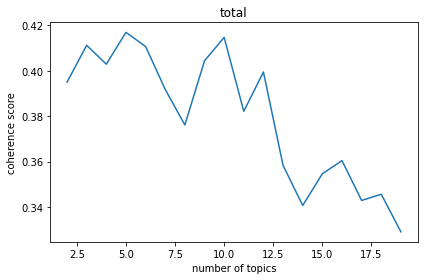

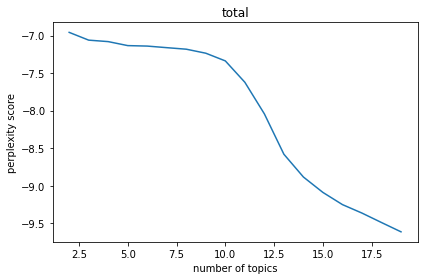

In [7]:
x = range(2, 20)
plt.plot(x, coherence_total)
plt.title('total')
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.tight_layout()
plt.show()

x = range(2, 20)
plt.plot(x, perplexity_total)
plt.title('total')
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.tight_layout()
plt.show()

---
# **4. Keyword find**
---

## 4.1 Ensemble (LDA, LSA, keyBERT)

In [ ]:
key_n = len(LDA1_total) * 10
score_total, ensemble_3_total = keyword_extract(LDA1_total, LSA_total, keybert_total, key_n)

In [ ]:
score_positive, ensemble_3_positive = keyword_extract(LDA1_positive, LSA_positive, keybert_positive, key_n)

In [ ]:
score_negative, ensemble_3_negative = keyword_extract(LDA1_negative, LSA_negative, keybert_negative, key_n)

In [ ]:
score_total.head()

,LDA1,LSA,keybert
0,"(감동, 0.048689)","(감동, 0.049358)","(배우, 0.057405)"
1,"(연기, 0.04552)","(감독, 0.047284)","(감동이, 0.052911)"
2,"(사람, 0.039758)","(사람, 0.046535)","(감동, 0.042714)"
3,"(사랑, 0.038317)","(연기, 0.045342)","(감동지, 0.036936)"
4,"(감독, 0.02881)","(기대, 0.045152)","(연기력, 0.03669)"


In [ ]:
# 연기 감동 배우 사람 감독 사랑 스토리 눈물 마음 기대
ensemble_3_total[:30]

[('감동', 0.18664299999999998),
 ('배우', 0.17672999999999997),
 ('사람', 0.136615),
 ('감독', 0.119004),
 ('눈물', 0.118496),
 ('연기', 0.098263),
 ('기대', 0.098162),
 ('사랑', 0.093452),
 ('스토리', 0.07615900000000002),
 ('내용', 0.07431499999999999),
 ('가슴', 0.07086100000000001),
 ('이야기', 0.064138),
 ('현실', 0.062078999999999995),
 ('감동이', 0.052911),
 ('연기력', 0.05131),
 ('마음', 0.049533999999999995),
 ('재미', 0.041607),
 ('이상', 0.038874000000000006),
 ('장면', 0.038600999999999996),
 ('시간', 0.037757),
 ('감동지', 0.036936),
 ('명배우', 0.036369),
 ('여운', 0.028089),
 ('이해', 0.027847),
 ('실화', 0.027828),
 ('결말', 0.024181),
 ('명작', 0.022574999999999998),
 ('연기자', 0.021508),
 ('남자', 0.020869),
 ('연출', 0.019947)]

## 4.2 Ensemble (tomoto LDAs)

In [8]:
ensemble_tp_total = Ensemble_LDA(topics_LDA_tp_total_many)
ensemble_tp_positive = Ensemble_LDA(topics_LDA_tp_positive_many)
ensemble_tp_negative = Ensemble_LDA(topics_LDA_tp_negative_many)

In [9]:
# 드라마
ensemble_tp_total[:15]

[('연기', 2.6722791297361255),
 ('감동', 2.146224904805422),
 ('배우', 1.4205620288848877),
 ('사람', 1.2396774226799607),
 ('감독', 1.0947033446282148),
 ('사랑', 1.078182628378272),
 ('스토리', 0.9199600638821721),
 ('눈물', 0.6698113474994898),
 ('마음', 0.5418299790471792),
 ('기대', 0.5295611042529345),
 ('음악', 0.5059689357876778),
 ('현실', 0.5000524623319507),
 ('가슴', 0.4942724034190178),
 ('장면', 0.48684979788959026),
 ('내용', 0.47205939795821905)]

In [ ]:
[('연기', 2.705886702053249),
 ('감동', 1.9551752330735326),
 ('배우', 1.4702448192983866),
 ('사람', 1.3334828549996018),
 ('사랑', 1.2363089313730597),
 ('감독', 1.063779704272747),
 ('스토리', 0.9724162640050054),
 ('눈물', 0.5921726273372769),
 ('마음', 0.5597937256097794),
 ('음악', 0.5524707064032555)]

In [ ]:
ensemble_tp_positive[:7]

[('연기', 2.826522797346115),
 ('감동', 2.4622366782277822),
 ('배우', 1.4595008892938495),
 ('사람', 1.4452648172155023),
 ('사랑', 1.364381842315197),
 ('감독', 0.908079270273447),
 ('눈물', 0.8767592925578356)]

In [ ]:
ensemble_tp_negative[:7]

[('감독', 1.742220868356526),
 ('사람', 1.2701659314334393),
 ('스토리', 1.2688216101378202),
 ('연기', 1.2523803152143955),
 ('배우', 1.129244833253324),
 ('내용', 1.05997281242162),
 ('쓰레기', 1.0188631527125835)]

---
# **5. keyword Ratio**
---


In [19]:
percent = 10
ratio_total = keyword_ratio(ensemble_tp_total, percent)
ratio_positive = keyword_ratio(ensemble_tp_positive, percent)
ratio_negative = keyword_ratio(ensemble_tp_negative, percent)

In [20]:
ratio_total # 연기 감동 배우 사람 사랑 감독 스토리

,word,score,all_ratio,ratio
0,연기,2.672279,10.288763,21.703275
1,감동,2.146225,8.263358,17.430855
2,배우,1.420562,5.469423,11.537286
3,사람,1.239677,4.772985,10.068207
4,감독,1.094703,4.214808,8.890781
5,사랑,1.078183,4.151200,8.756606
6,스토리,0.919960,3.542014,7.471580
7,눈물,0.669811,2.578896,5.439963
8,마음,0.541830,2.086144,4.400545
9,기대,0.529561,2.038907,4.300902


In [ ]:
ratio_positive

,word,score,all_ratio,ratio
0,연기,2.826523,10.269893,29.572612
1,감동,2.462237,8.946295,25.761254
2,배우,1.459501,5.302953,15.270089
3,사람,1.445265,5.251228,15.121143
4,사랑,1.364382,4.957347,14.274902


In [ ]:
ratio_negative

,word,score,all_ratio,ratio
0,감독,1.742221,6.875810,19.930070
1,사람,1.270166,5.012809,14.530015
2,스토리,1.268822,5.007503,14.514637
3,연기,1.252380,4.942616,14.326558
4,배우,1.129245,4.456653,12.917954
5,내용,1.059973,4.183265,12.125519
6,쓰레기,1.018863,4.021023,11.655247


---
# **6. Similar word**
---

In [21]:
n_word = len(ratio_total)
sim_word = 4
similar_total = similar_word(CTM_total, ensemble_tp_total, n_word, sim_word)
similar_positive = similar_word(CTM_positive, ensemble_tp_positive, n_word, sim_word)
similar_negative = similar_word(CTM_negative, ensemble_tp_negative, n_word, sim_word)

In [22]:
print('total similar word')
for i in similar_total:
    print(f'{i}: ', similar_total[i])

total similar word
연기:  ['연기력', '부분', '장면', '연출', '대박', '배우', '감정', '마음', '디카프리오']
감동:  ['오랜만', '강추', '눈물', '억지', '재미', '실화']
배우:  ['연기력', '연출', '대박', '연기', '감정', '마음', '디카프리오']
사람:  ['인간', '주인공', '남자', '여자', '이해', '공감']
감독:  ['감사', '표현', '장면', '홍상수', '김기덕', '관객']
사랑:  ['남자', '여자', '이야기', '감정', '엄마', '순수']
스토리:  ['영상미', '부족', '연출']
눈물:  ['가슴', '감동', '장면', '오랜만', '강추', '마음']
마음:  ['가슴', '장면', '연기', '배우', '눈물', '감정']
기대:  ['엔딩', '실망', '이상']


In [ ]:
print('positive similar word')
for i in similar_positive:
    print(f'{i}: ', similar_positive[i])

positive similar word
연기:  ['연기력', '배우', '눈물', '이병헌', '장면', '가슴', '몰입', '연출', '스토리', '연기']
감동:  ['여운', '재미', '웃음', '실화', '감동', '스토리']
배우:  ['연기력', '배우', '이병헌', '몰입', '연출', '스토리', '연기']
사람:  ['자신', '사람', '주인공', '세상', '이해', '인간']
사랑:  ['기억', '열정', '시절', '영원', '사랑', '순수', '이야기']
감독:  ['홍상수', '김기덕', '감독', '평론가']


In [ ]:
print('negative similar word')
for i in similar_negative:
    print(f'{i}: ', similar_negative[i])

negative similar word
감독:  ['사람', '배우', '관객', '조재현', '예술', '연출', '감독', '이야기', '김기덕', '홍상수']
사람:  ['사람', '공감', '현실', '예술', '감독', '이야기', '종교', '기독교', '이해', '인간']
스토리:  ['배우', '개연', '연출', '스토리', '전개', '감동', '억지', '연기']
연기:  ['주연', '연기력', '배우', '연출', '시나리오', '스토리', '연기']
배우:  ['주연', '연기력', '배우', '관객', '연출', '시나리오', '스토리', '감독', '연기']
내용:  ['주제', '장면', '내용', '의미']


---
# **7. Save data**
---

In [ ]:
file_path = '/content/drive/MyDrive/data/movie_keyword/result/'
file_name = f'{genre}_ensemble_3.pkl'
with open (file_path + file_name, 'wb') as f:
    pickle.dump((score_total, ensemble_3_total,
                 score_positive, ensemble_3_positive,
                 score_negative, ensemble_3_negative), f)

In [ ]:
file_path = '/content/drive/MyDrive/data/movie_keyword/result/'
file_name = f'{genre}_ensemble_tp.pkl'
with open (file_path + file_name, 'wb') as f:
    pickle.dump((ensemble_tp_total, ensemble_tp_positive, ensemble_tp_negative), f)

In [ ]:
ratio_total['similar_word'] = pd.Series(similar_total.values())
ratio_positive['similar_word'] = pd.Series(similar_positive.values())
ratio_negative['similar_word'] = pd.Series(similar_negative.values())

In [ ]:
ratio_total

,word,score,all_ratio,ratio,similar_word
0,연기,2.705887,10.255830,27.710399,"[연기력, 배우, 대박, 연출, 아역, 스토리, 감동, 연기]"
1,감동,1.955175,7.410490,20.022525,"[배우, 눈물, 재미, 실화, 감동, 스토리, 감사, 억지, 오랜만, 연기]"
2,배우,1.470245,5.572510,15.056458,"[연기력, 배우, 대박, 연출, 아역, 스토리, 감동, 연기]"
3,사람,1.333483,5.054156,13.655909,"[사람, 공감, 주인공, 감정, 남자, 인간]"
4,사랑,1.236309,4.685848,12.660772,"[이야기, 사랑, 순수, 가슴]"
5,감독,1.063780,4.031929,10.893937,"[기대, 천재, 이상, 연출, 감독, 김기덕, 홍상수]"


In [ ]:
ratio_positive

,word,score,all_ratio,ratio,similar_word
0,연기,2.826523,10.269893,29.572612,"[연기력, 배우, 눈물, 이병헌, 장면, 가슴, 몰입, 연출, 스토리, 연기]"
1,감동,2.462237,8.946295,25.761254,"[여운, 재미, 웃음, 실화, 감동, 스토리]"
2,배우,1.459501,5.302953,15.270089,"[연기력, 배우, 이병헌, 몰입, 연출, 스토리, 연기]"
3,사람,1.445265,5.251228,15.121143,"[자신, 사람, 주인공, 세상, 이해, 인간]"
4,사랑,1.364382,4.957347,14.274902,"[기억, 열정, 시절, 영원, 사랑, 순수, 이야기]"


In [ ]:
ratio_negative

,word,score,all_ratio,ratio,similar_word
0,감독,1.742221,6.875810,19.930070,"[사람, 배우, 관객, 조재현, 예술, 연출, 감독, 이야기, 김기덕, 홍상수]"
1,사람,1.270166,5.012809,14.530015,"[사람, 공감, 현실, 예술, 감독, 이야기, 종교, 기독교, 이해, 인간]"
2,스토리,1.268822,5.007503,14.514637,"[배우, 개연, 연출, 스토리, 전개, 감동, 억지, 연기]"
3,연기,1.252380,4.942616,14.326558,"[주연, 연기력, 배우, 연출, 시나리오, 스토리, 연기]"
4,배우,1.129245,4.456653,12.917954,"[주연, 연기력, 배우, 관객, 연출, 시나리오, 스토리, 감독, 연기]"
5,내용,1.059973,4.183265,12.125519,"[주제, 장면, 내용, 의미]"
6,쓰레기,1.018863,4.021023,11.655247,NaN


In [ ]:
SF_total = Ensemble_LDA(topics_LDA_tp_total_many)
SF_total[:7]

[('연기', 2.6722791297361255),
 ('감동', 2.146224904805422),
 ('배우', 1.4205620288848877),
 ('사람', 1.2396774226799607),
 ('감독', 1.0947033446282148),
 ('사랑', 1.078182628378272),
 ('스토리', 0.9199600638821721)]

In [ ]:
percent = 3
SF_ratio = keyword_ratio(SF_total, percent)
SF_ratio

,word,score,all_ratio,ratio
0,연기,2.672279,10.288763,42.831397
1,감동,2.146225,8.263358,34.399778
2,배우,1.420562,5.469423,22.768825


In [ ]:
n_word = len(SF_ratio)
sim_word = 4
SF_similar = similar_word(CTM_total, SF_total, n_word, sim_word)
SF_similar

{'감동': ['실화', '재미', '강추', '오랜만', '억지', '눈물'],
 '배우': ['연기', '디카프리오', '감정', '연기력', '연출', '대박', '마음'],
 '연기': ['디카프리오', '배우', '감정', '연기력', '부분', '연출', '장면', '대박', '마음']}

In [ ]:
SF_ratio['similar_word'] = pd.Series(SF_similar.values())
# SF_ratio.loc['w']
SF_ratio.loc[:, ['word', 'all_ratio', 'ratio', 'similar_word']].head(15)

,word,all_ratio,ratio,similar_word
0,연기,10.288763,42.831397,"[디카프리오, 배우, 감정, 연기력, 부분, 연출, 장면, 대박, 마음]"
1,감동,8.263358,34.399778,"[실화, 재미, 강추, 오랜만, 억지, 눈물]"
2,배우,5.469423,22.768825,"[연기, 디카프리오, 감정, 연기력, 연출, 대박, 마음]"


## 불러오기

In [56]:
# 장르 이름 수정
genre = '드라마'
file_path = f'/content/drive/MyDrive/final-project/processed_data/result/{genre}/'
n_random = 10

In [57]:
file_name = f'{genre}_coherence_perplexity.pkl'
with open (file_path + file_name, 'rb') as f:
    coherence_total, perplexity_total = pickle.load(f)

file_name = f'{genre}_LDA1.pkl'
with open (file_path + file_name, 'rb') as f:
    (LDA1_total, vis_LDA1_total,
     LDA1_positive, vis_LDA1_positive,
     LDA1_negative, vis_LDA1_negative) = pickle.load(f)    
    
file_name = f'{genre}_LDA2.pkl'
with open (file_path + file_name, 'rb') as f:
    LDA2_total, LDA2_positive, LDA2_negative = pickle.load(f)
    
file_name = f'{genre}_LSA.pkl'
with open (file_path + file_name, 'rb') as f:
    LSA_total, LSA_positive, LSA_negative = pickle.load(f)    
    
# file_name = f'{genre}_keybert_3.pkl'
# with open (file_path + file_name, 'rb') as f:
#     keybert_total, keybert_positive, keybert_negative = pickle.load(f)    
    
file_name = f'{genre}_CTM.pkl'
with open (file_path+file_name, 'rb') as f:
    (CTM_total, ctm_pd_total,
     CTM_positive, ctm_pd_positive,
     CTM_negative, ctm_pd_negative) = pickle.load(f)

file_name = f'{genre}_LDA_tp_many_{n_random}.pkl'   
with open (file_path + file_name, 'rb') as f:
    topics_LDA_tp_total_many, topics_LDA_tp_positive_many, topics_LDA_tp_negative_many = pickle.load(f)

In [59]:
total = Ensemble_LDA(topics_LDA_tp_total_many)

percent = 3
# ratio = keyword_ratio(total, percent)
ratio = getratio(total)

n_word = len(ratio)
sim_word = 4
similar = similar_word(CTM_total, total, n_word, sim_word)

ratio['similar_word'] = pd.Series(similar.values())
# ratio.loc[:, ['word', 'all_ratio', 'ratio', 'similar_word']].head(15)
ratio.head(15)

,word,score,all_ratio,similar_word
0,연기,2.672279,10.288763,"[연기력, 부분, 장면, 연출, 대박, 배우, 감정, 마음, 디카프리오]"
1,감동,2.146225,8.263358,"[오랜만, 강추, 눈물, 억지, 재미, 실화]"
2,배우,1.420562,5.469423,"[연기력, 연출, 대박, 연기, 감정, 마음, 디카프리오]"
3,사람,1.239677,4.772985,"[인간, 주인공, 남자, 여자, 이해, 공감]"
4,감독,1.094703,4.214808,"[감사, 표현, 장면, 홍상수, 김기덕, 관객]"
5,사랑,1.078183,4.151200,"[남자, 여자, 이야기, 감정, 엄마, 순수]"
6,스토리,0.919960,3.542014,"[영상미, 부족, 연출]"
7,눈물,0.669811,2.578896,"[가슴, 감동, 장면, 오랜만, 강추, 마음]"
8,마음,0.541830,2.086144,"[가슴, 장면, 연기, 배우, 눈물, 감정]"
9,기대,0.529561,2.038907,"[엔딩, 실망, 이상]"


In [ ]:
import numpy as np
total = 10.288763 + 8.263358 + 5.469423 + 4.772985 + 4.214808 + 4.151200 + 3.542014
for i in ratio['all_ratio'][:8]:
    print(np.round(i/total*100, 2))

25.28
20.3
13.44
11.73
10.36
10.2
8.7
6.34


In [ ]:
len(ratio)

117

In [ ]:
import pickle

PATH = f'/content/drive/MyDrive/final-project/processed_data/keyword/{genre}/'
file_name = f'{genre}_keyword_result.pkl'
with open(PATH + file_name, 'wb') as f:
    pickle.dump(ratio, f)

In [ ]:
genre_list = ['판타지', '다큐멘터리', '뮤지컬', '전쟁', '액션', '공포', '느와르', '모험', 'SF', '스릴러', '범죄', '멜로애정로맨스', '코미디', '애니메이션', '미스터리', '가족', '드라마']
len(genre_list)

17

In [ ]:
import pickle
n_random = 10
def LoadData(genre):
    file_path = f'/content/drive/MyDrive/final-project/processed_data/result/{genre}/'
    file_name = f'{genre}_coherence_perplexity.pkl'
    with open (file_path + file_name, 'rb') as f:
        coherence_total, perplexity_total = pickle.load(f)

    file_name = f'{genre}_LDA1.pkl'
    with open (file_path + file_name, 'rb') as f:
        (LDA1_total, vis_LDA1_total,
        LDA1_positive, vis_LDA1_positive,
        LDA1_negative, vis_LDA1_negative) = pickle.load(f)    
        
    file_name = f'{genre}_LDA2.pkl'
    with open (file_path + file_name, 'rb') as f:
        LDA2_total, LDA2_positive, LDA2_negative = pickle.load(f)
        
    file_name = f'{genre}_LSA.pkl'
    with open (file_path + file_name, 'rb') as f:
        LSA_total, LSA_positive, LSA_negative = pickle.load(f)    
        
    # file_name = f'{genre}_keybert_3.pkl'
    # with open (file_path + file_name, 'rb') as f:
    #     keybert_total, keybert_positive, keybert_negative = pickle.load(f)    
        
    file_name = f'{genre}_CTM.pkl'
    with open (file_path+file_name, 'rb') as f:
        (CTM_total, ctm_pd_total,
        CTM_positive, ctm_pd_positive,
        CTM_negative, ctm_pd_negative) = pickle.load(f)

    file_name = f'{genre}_LDA_tp_many_{n_random}.pkl'   
    with open (file_path + file_name, 'rb') as f:
        topics_LDA_tp_total_many, topics_LDA_tp_positive_many, topics_LDA_tp_negative_many = pickle.load(f)

    total = Ensemble_LDA(topics_LDA_tp_total_many)

    # percent = 4
    # ratio = keyword_ratio(total, percent)
    ratio = getratio(total)

    n_word = len(ratio)
    sim_word = 4
    similar = similar_word(CTM_total, total, n_word, sim_word)

    ratio['similar_word'] = pd.Series(similar.values())
    # ratio.head(10)

    PATH = f'/content/drive/MyDrive/final-project/processed_data/keyword/'
    file_name = f'{genre}_keyword_result.pkl'
    with open(PATH + file_name, 'wb') as f:
        pickle.dump(ratio, f)   

In [ ]:
PATH = f'/content/drive/MyDrive/final-project/processed_data/keyword/'

for i in genre_list:
    try:
        LoadData(i)
    except Exception as e:
        print(i, e)